In [122]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dropout,Activation
from keras.datasets import mnist 
from keras.optimizers import Adam,SGD,RMSprop
from keras.utils import np_utils
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets("c:/Users/HP/Desktop/mnist/", one_hot=True)

In [123]:
# f = np.load(path)
#      17     x_train, y_train = f['x_train'], f['y_train']
#      18     x_test, y_test = f['x_test'], f['y_test']

In [124]:
f = np.load('c:/Users/HP/Downloads/mnist.npz')
f

In [125]:
x_train, y_train = f['x_train'], f['y_train']
x_test, y_test = f['x_test'], f['y_test']

In [126]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)


In [127]:
x_train = x_train.astype('float32')
x_test =  x_test.astype('float32')


In [128]:
x_train = x_train/255 
x_test = x_test/255


In [129]:
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

In [130]:
y_train.shape,y_test.shape

((60000,), (10000,))

In [131]:
plt.ion()

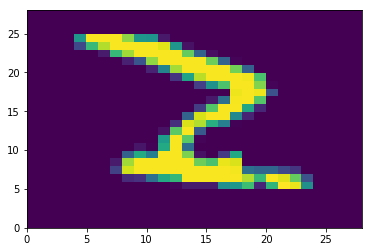

In [132]:
plt.pcolor(x_train[0].reshape(28,28))


In [133]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [134]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [135]:
y_train = np_utils.to_categorical(y_train)


In [136]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [137]:
y_test = np_utils.to_categorical(y_test)

In [138]:
y_test[:]

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [139]:
y_test[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [140]:
model = Sequential()

In [141]:
from keras.layers.core import Dense,Dropout,Activation

In [142]:
model.add(Dense(128,input_shape = (784,)))

In [143]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               100480    
Total params: 100,480
Trainable params: 100,480
Non-trainable params: 0
_________________________________________________________________


In [144]:
model.add(Activation ('sigmoid'))

In [145]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
Total params: 100,480
Trainable params: 100,480
Non-trainable params: 0
_________________________________________________________________


In [146]:
model.add(Dense(10))

In [147]:
#if you accidentally add another layer like dense or pooling or activation you
# can delete like the folllowing way TIP

In [148]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [149]:
model.layers

In [150]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [151]:
model.add(Activation('softmax'))

In [152]:
sgd = SGD()

In [153]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_7 (Activation)    (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [154]:
model.compile(optimizer=sgd,loss='categorical_crossentropy')

In [155]:
model.fit(x_train,y_train,batch_size=128,epochs=10,validation_data=(x_test,y_test),verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s - loss: 2.0315 - val_loss: 1.7571
Epoch 2/10
60000/60000 [==============================] - 5s - loss: 1.5440 - val_loss: 1.3263
Epoch 3/10
60000/60000 [==============================] - 5s - loss: 1.1889 - val_loss: 1.0384
Epoch 4/10
60000/60000 [==============================] - 5s - loss: 0.9605 - val_loss: 0.8580
Epoch 5/10
60000/60000 [==============================] - 5s - loss: 0.8152 - val_loss: 0.7411
Epoch 6/10
60000/60000 [==============================] - 5s - loss: 0.7186 - val_loss: 0.6612
Epoch 7/10
60000/60000 [==============================] - 6s - loss: 0.6504 - val_loss: 0.6035
Epoch 8/10
60000/60000 [==============================] - 5s - loss: 0.5998 - val_loss: 0.5595
Epoch 9/10
60000/60000 [==============================] - 5s - loss: 0.5610 - val_loss: 0.5254
Epoch 10/10
60000/60000 [==============================] - 6s - loss: 0.5303 - val_loss: 0.4981

In [156]:
score = model.evaluate(x_test,y_test,verbose=1,batch_size=128)
score

10000/10000 [==============================] - 0s     


0.49813158183097839

In [157]:
#in the above score 1.2624 and validation score in fit 1.2624 is same which is test data

In [158]:
a = model.get_weights()

In [159]:
len(a)

4

In [160]:
for i in range(len(a)):
    print(len(a[i]))
    #we passed input values 784 pixels and neurons are 128 in layer1
    #after softmax activation function the number of weights are 10 which is in dense layer2 as you can see below
    #the required classes are 10 and we have correpsonding weights here.

784
128
128
10


In [161]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_7 (Activation)    (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
